# TMDb Movie Data Analysis
A beginner-friendly data science project analyzing movie data from TMDb.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

pd.set_option('display.max_columns', None)

In [2]:
# Load datasets
movies_df = pd.read_csv('datasets/tmdb_5000_movies.csv')
credits_df = pd.read_csv('datasets/tmdb_5000_credits.csv')

In [3]:
# Merge datasets
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
df = movies_df.merge(credits_df, on='id')
df.shape, df.columns

((4803, 23),
 Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
        'original_title', 'overview', 'popularity', 'production_companies',
        'production_countries', 'release_date', 'revenue', 'runtime',
        'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
        'vote_count', 'title_y', 'cast', 'crew'],
       dtype='object'))

In [4]:
# Data cleaning
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

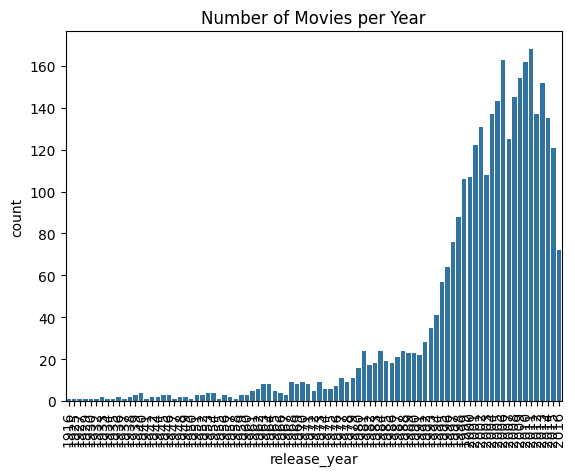

In [5]:
# Movies per year
sns.countplot(data=df, x='release_year')
plt.xticks(rotation=90)
plt.title('Number of Movies per Year')
plt.show()

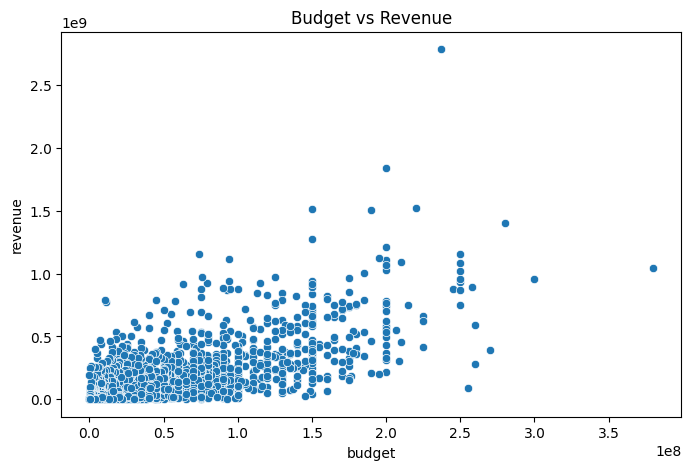

In [6]:
# Budget vs Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.show()

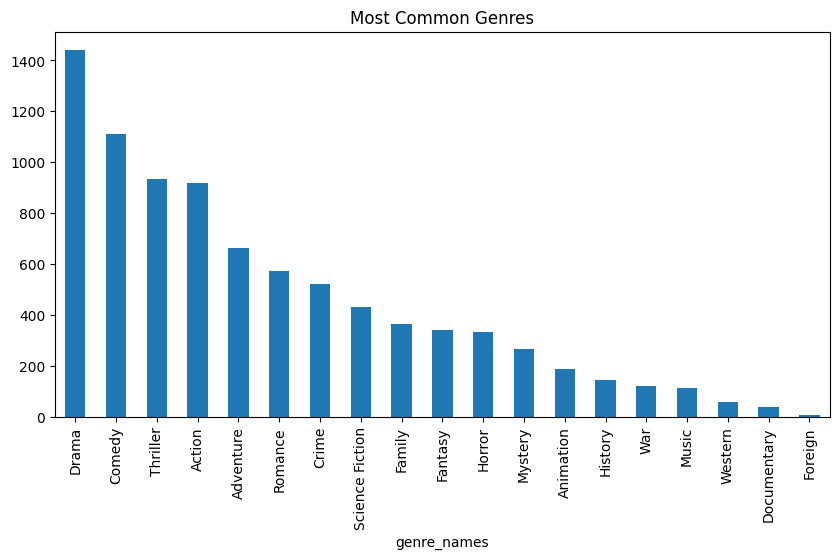

In [7]:
# Analyze genres
df['genres'] = df['genres'].apply(ast.literal_eval)
df['genre_names'] = df['genres'].apply(lambda x: [i['name'] for i in x])
genre_list = df['genre_names'].explode()
genre_counts = genre_list.value_counts()
genre_counts.plot(kind='bar', figsize=(10,5), title='Most Common Genres')
plt.show()

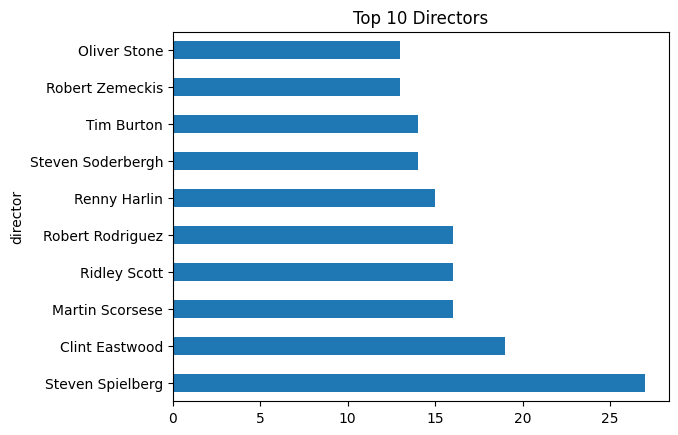

In [8]:
# Analyze directors
df['crew'] = df['crew'].apply(ast.literal_eval)
df['director'] = df['crew'].apply(lambda crew: next((i['name'] for i in crew if i['job'] == 'Director'), None))
df['director'].value_counts().head(10).plot(kind='barh', title='Top 10 Directors')
plt.show()